In [215]:
import tensorflow as tf
import tensorflowjs as tfjs
from tensorflow import keras
import numpy as np
import json
import matplotlib.pyplot as plt

In [225]:
def get_color_labels_dict():
    return {
        "red-ish": 0,
        "green-ish": 1,
        "blue-ish": 2,
        "orange-ish": 3,
        "yellow-ish": 4,
        "pink-ish": 5,
        "purple-ish": 6,
        "brown-ish": 7,
        "gray-ish": 8,
    }

def get_target_name(index):
    labels_dict = get_color_labels_dict()
    
    for key, value in labels_dict.items():
        if value == index:
            return key

def encode_color_labels_as_int(labels):
    labels_dict = get_color_labels_dict()
    
    return list(map(lambda label: labels_dict[label], labels))

def get_rgb_values(color):
    rgb_array = [color['red'], color['green'], color['blue']]
    return rgb_array

def get_color_label(color):
    return color["label"]

def load_json():
    path = "./data/labeled-colors-285.json"

    with open(path) as json_file:
        json_str = json_file.read()

    return json.loads(json_str)

def prep_data(data):
    rgb_list = list(map(get_rgb_values, data))
    labels_as_string = list(map(get_color_label, data))
    labels_as_int = encode_color_labels_as_int(labels_as_string)
    
    rgb_ndarray = np.array(rgb_list)
    labels_ndarray = np.array(labels_as_int)
    
    return (rgb_ndarray, labels_ndarray)

def load_data():
    colors_array = load_json()
    prepped_data = prep_data(colors_array)
    return prepped_data

# Plot a grid of individual colors from the dataset
# The colors won’t be labeled
# I tried using annotate to label the colors, but positioning the labels was tedious
def plot_colors(one_hundred_colors):
    plt.figure(figsize=(12, 12), facecolor="black", tight_layout=True)
    # We reshape the colors into a square, so we need to know the size of the passed argument ahead of time...
    # That’s why it’s called one_hundred_colors
    plt.imshow(one_hundred_colors.reshape(10, 10, 3))
    plt.axis("off")
    plt.annotate('Test', xy=(0.9, 0.0), xycoords="axes fraction")
    
# Plot a bunch of colors from the dataset, and their labels
def plot_train_data(X, y, start=0):
    n_rows = 4
    n_cols = 8
    plt.figure(figsize=(n_cols * 2, n_rows * 2))
    for row in range(n_rows):
        for col in range(n_cols):
            index = n_cols * row + col
            plt.subplot(n_rows, n_cols, index + 1)
            
            data_index = start + index
            
            color = X[data_index, :]
            color = color[np.newaxis, :]
            color = color.reshape(1, 1, 3)
            
            target_name = get_target_name(y[data_index])
            
            plt.imshow(color)
            plt.axis('off')
            plt.title(target_name, fontsize=12)
    plt.subplots_adjust(wspace=0.2, hspace=0.5)
    plt.show()

In [217]:
X_train, y_train = load_data()

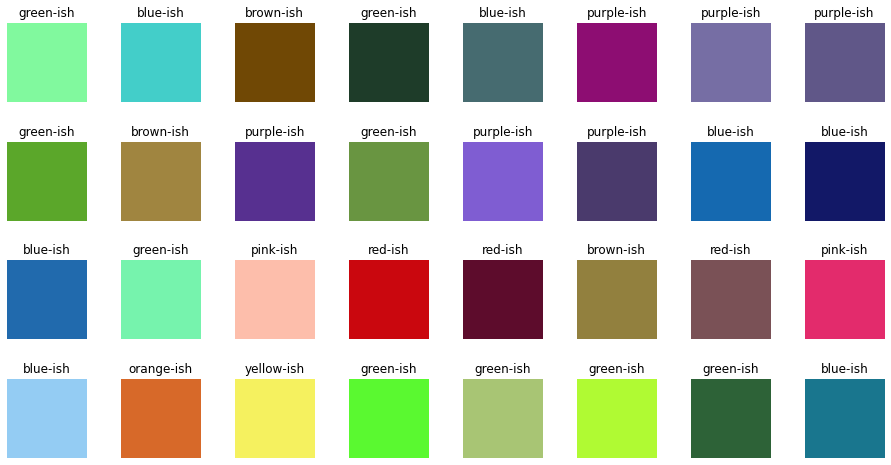

In [226]:
plot_train_data(X_train, y_train, start=150)